In [1]:
# 07_trend_longitudinali.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üì• Carica dataset
df = pd.read_parquet("../data/processed/RM_Dimessi_clean.parquet")

# üßπ Pulizia minima
df = df[df["anno"].notna()]
df["anno"] = df["anno"].astype(int)

/Users/dantetrabassi/Desktop/rehab-intelligence/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


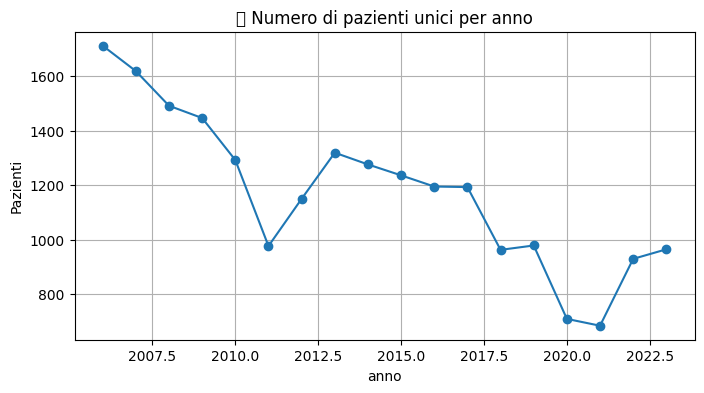

In [2]:
df["patient_id_unico"] = df["patient_id"].astype(str)

pazienti_per_anno = df.groupby("anno")["patient_id_unico"].nunique()

plt.figure(figsize=(8, 4))
pazienti_per_anno.plot(marker='o')
plt.title("üë• Numero di pazienti unici per anno")
plt.ylabel("Pazienti")
plt.grid(True)
plt.show()

/Users/dantetrabassi/Desktop/rehab-intelligence/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


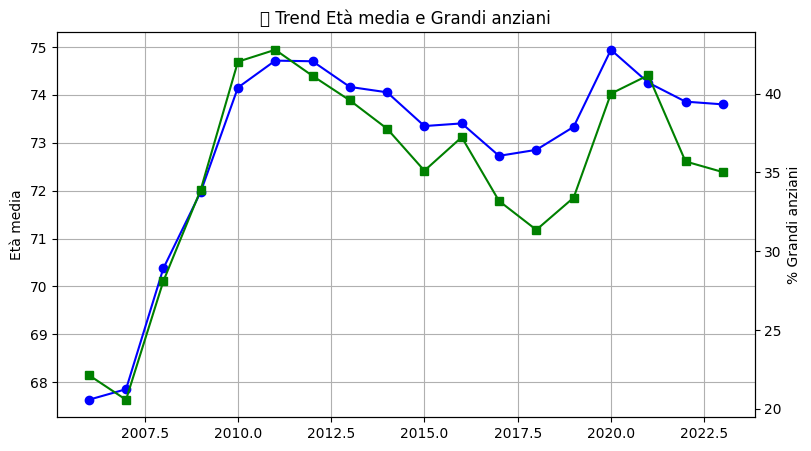

In [3]:
df["et√†_clinica"] = df["et√† del paziente dimesso"].apply(
    lambda x: "adulto" if x < 65 else "anziano" if x < 80 else "grande_anziano"
)

# Et√† media
eta_media = df.groupby("anno")["et√† del paziente dimesso"].mean()

# % grandi anziani
grandi_anziani = df[df["et√†_clinica"] == "grande_anziano"].groupby("anno")["patient_id"].count()
totali = df.groupby("anno")["patient_id"].count()
percentuali = (grandi_anziani / totali) * 100

# üìä Plot
fig, ax1 = plt.subplots(figsize=(9, 5))
ax1.plot(eta_media, label="Et√† media", color="blue", marker="o")
ax2 = ax1.twinx()
ax2.plot(percentuali, label="% Grandi anziani", color="green", marker="s")

ax1.set_ylabel("Et√† media")
ax2.set_ylabel("% Grandi anziani")
plt.title("üìà Trend Et√† media e Grandi anziani")
ax1.grid(True)
plt.show()

/Users/dantetrabassi/Desktop/rehab-intelligence/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


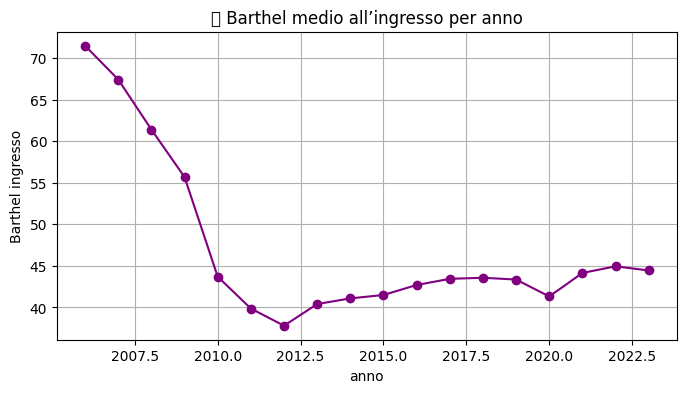

In [4]:
barthel_cols = [f"bartric{i}" for i in range(1, 12)]
df["barthel_totale_ingresso"] = df[barthel_cols].sum(axis=1)

barthel_trend = df.groupby("anno")["barthel_totale_ingresso"].mean()

plt.figure(figsize=(8, 4))
barthel_trend.plot(marker='o', color='purple')
plt.title("üß¨ Barthel medio all‚Äôingresso per anno")
plt.ylabel("Barthel ingresso")
plt.grid(True)
plt.show()

/Users/dantetrabassi/Desktop/rehab-intelligence/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


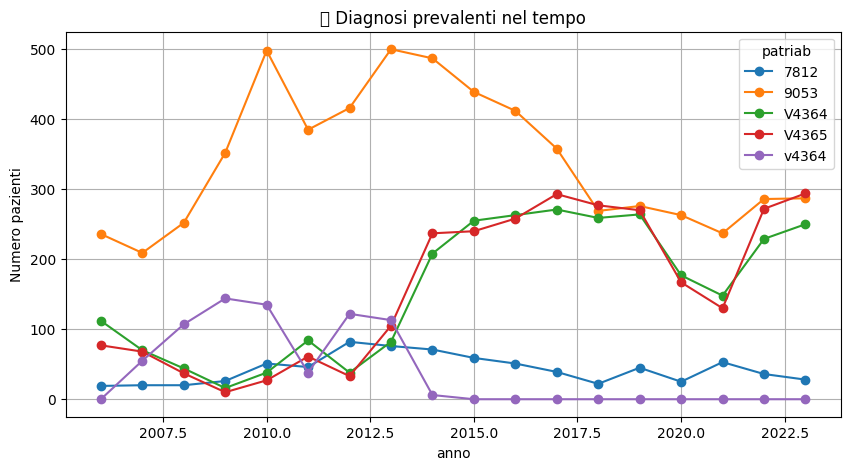

In [5]:
diagnosi_top = df["patriab"].value_counts().nlargest(5).index.tolist()
df_filt = df[df["patriab"].isin(diagnosi_top)]

diagnosi_trend = df_filt.groupby(["anno", "patriab"])["patient_id"].count().unstack().fillna(0)

diagnosi_trend.plot(marker='o', figsize=(10, 5))
plt.title("üìä Diagnosi prevalenti nel tempo")
plt.ylabel("Numero pazienti")
plt.grid(True)
plt.show()

üìä Sintesi visiva dei tuoi 4 grafici
1. üìà Diagnosi prevalenti nel tempo
Codice 9053 (probabilmente frattura del collo femore?) domina fino al 2017.
Dal 2014 circa, emergono V4364, V4365 (riabilitazioni specifiche?) che superano 9053.
Diagnosi 7812 rimane marginale ma stabile.

üîç Insight: si intravede un cambiamento nel case-mix ‚Üí potrebbe riflettere una variazione nei criteri di accesso, politica regionale, o capacit√† erogativa.

2. ü¶æ Barthel medio all‚Äôingresso per anno
Crollo tra 2006 e 2011 (da 71 ‚Üí 38), poi stabilizzazione attorno a 43.
Picco negativo nel 2012, poi recupero graduale.

üîç Insight: cambiamento importante nel livello funzionale iniziale dei pazienti. Possibile cambiamento nel tipo di pazienti accettati o nel criterio di valutazione.

3. üë¥ Et√† media & % grandi anziani
L‚Äôet√† media sale da 68 ‚Üí 75 (2006‚Äì2011), poi si stabilizza.
La % di grandi anziani (>80 anni) raggiunge oltre il 40% tra 2010‚Äì2020.

üîç Insight: invecchiamento progressivo della popolazione trattata. Ottimo dato per sostenere un eventuale bisogno di modelli predittivi mirati all'et√†.

4. üë• Numero di pazienti unici per anno
Tendenza in calo dal 2006 al 2021 (da ~1700 a ~700).
Ripresa solo marginale nel 2022.

üîç Insight: utile per il Policlinico per analisi di efficienza, budget o valutazioni legate alla domanda storica di riabilitazione.

In [7]:
import os

files = [
    "../results/figures/trend_pazienti_unici.png",
    "../results/figures/trend_eta_grandianziani.png",
    "../results/figures/trend_barthel_ingresso.png",
    "../results/figures/trend_diagnosi.png"
]

for f in files:
    print(f"{f} ‚Üí {'‚úÖ trovato' if os.path.exists(f) else '‚ùå NON trovato'}")

../results/figures/trend_pazienti_unici.png ‚Üí ‚úÖ trovato
../results/figures/trend_eta_grandianziani.png ‚Üí ‚úÖ trovato
../results/figures/trend_barthel_ingresso.png ‚Üí ‚úÖ trovato
../results/figures/trend_diagnosi.png ‚Üí ‚úÖ trovato
